# basic imports 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe().transpose()

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [4]:
from ydata_profiling import ProfileReport

In [5]:
report = ProfileReport(df)

In [6]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='income', ylabel='count'>

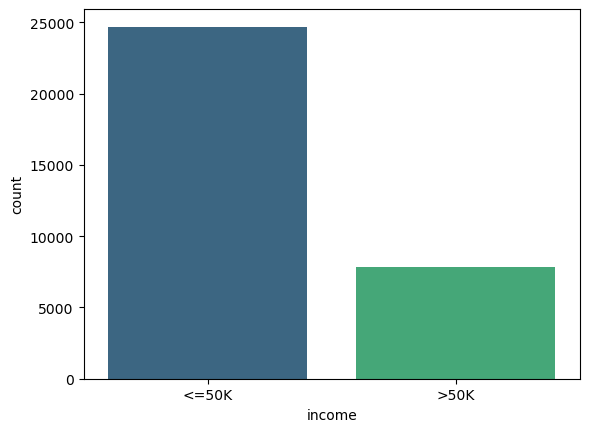

In [9]:
%matplotlib inline
sns.countplot(x='income',data=df,palette='viridis')

<Axes: >

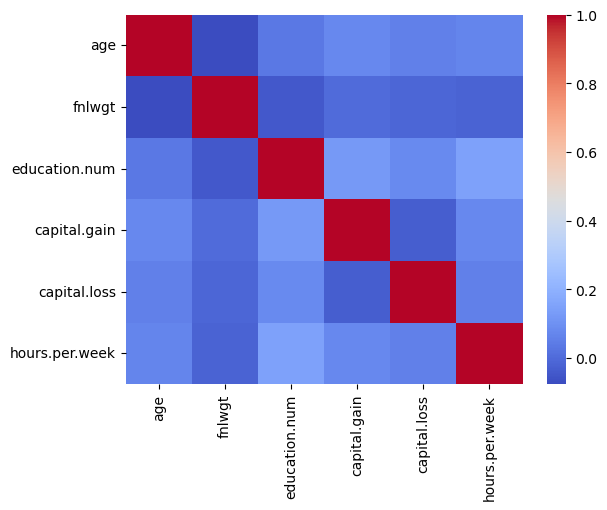

In [10]:
sns.heatmap(df.select_dtypes(include='number').corr(),cmap='coolwarm')

In [4]:
#replacing ? with nan
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [12]:
#missing - workclass,occupation,native.country
#workclass and occupation have high correlation

<Axes: xlabel='workclass', ylabel='count'>

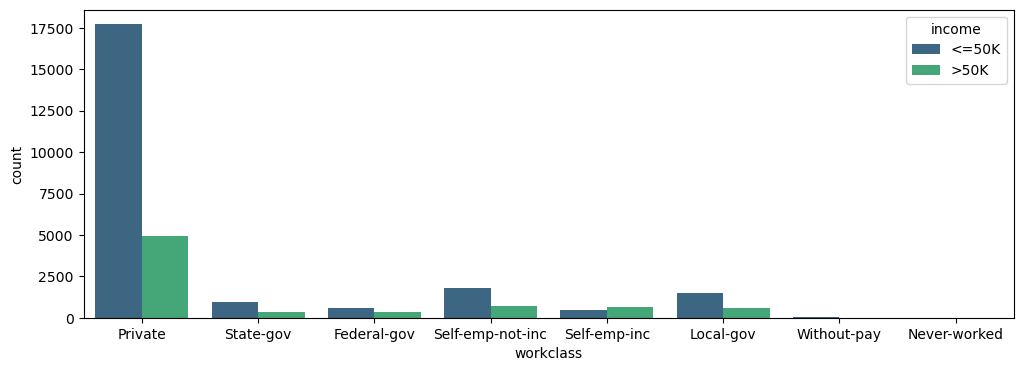

In [13]:
#filling workclass column
plt.figure(figsize=(12,4))
sns.countplot(x='workclass',data=df,hue='income',palette='viridis')

In [5]:
#as most of cases are from private sector (for greater and less than 50k) imputing privte for nana
df['workclass'] = df['workclass'].fillna('Private')

<Axes: xlabel='occupation', ylabel='count'>

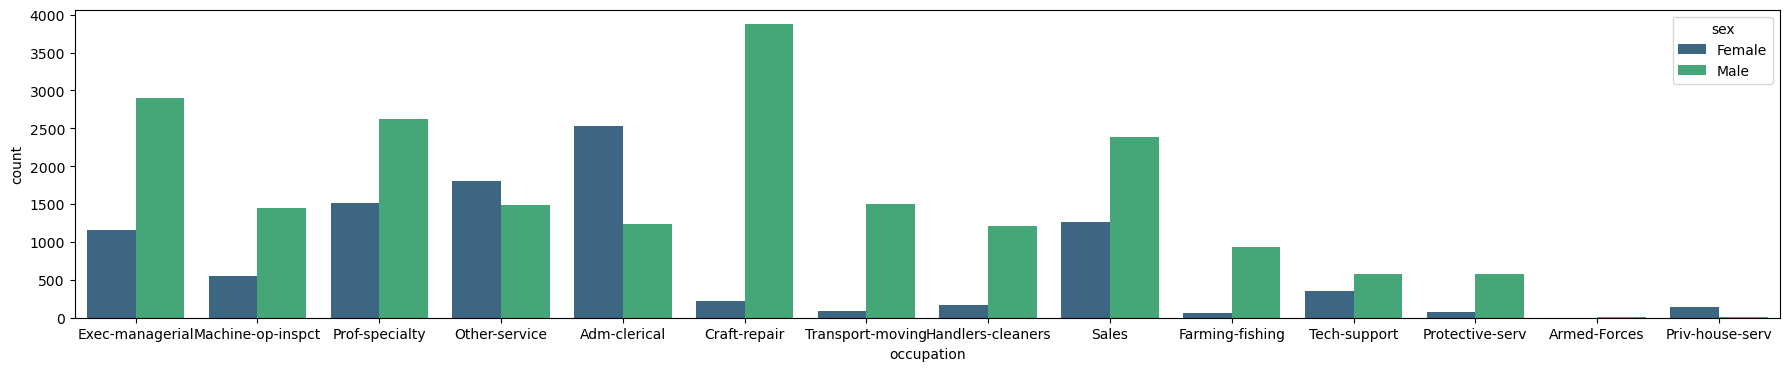

In [15]:
#filling workclass column
plt.figure(figsize=(22,4))
sns.countplot(x='occupation',data=df,hue='sex',palette='viridis')

<Axes: xlabel='occupation', ylabel='count'>

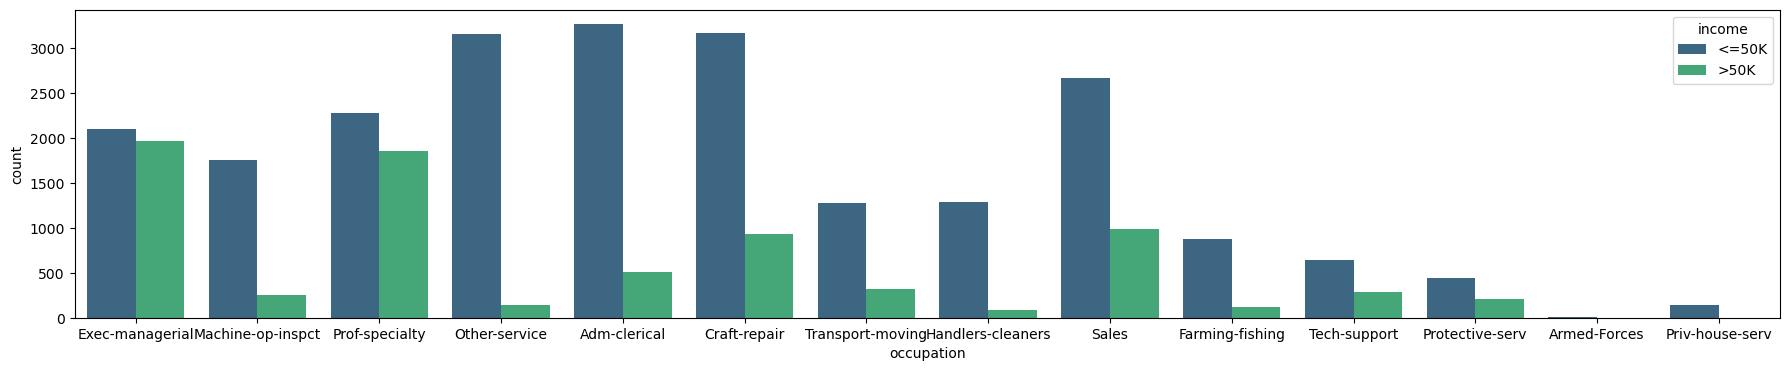

In [16]:
plt.figure(figsize=(22,4))
sns.countplot(x='occupation',data=df,hue='income',palette='viridis')

In [6]:
def occ(cols):
    if cols[0] == "Male" and cols[1] == "<=50K" and pd.isnull(cols[2]):
        cols[2] = 'Craft-repair'
    elif cols[0] == "Male" and cols[1] == ">50K" and pd.isnull(cols[2]):
        cols[2] = 'Exec-managerial'
    elif cols[0] == "Female" and cols[1] == "<=50K" and pd.isnull(cols[2]):
        cols[2] = 'Adm-clerical'
    elif cols[0] == "Female" and cols[1] == ">50K" and pd.isnull(cols[2]):
        cols[2] = 'Prof-specialty'
    return cols

        
    

In [7]:
df[['sex','income','occupation']] = df[['sex','income','occupation']].apply(occ,axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [8]:
#filling native.country
df['native.country'].value_counts()
df['native.country'].fillna('United-States',inplace=True)

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


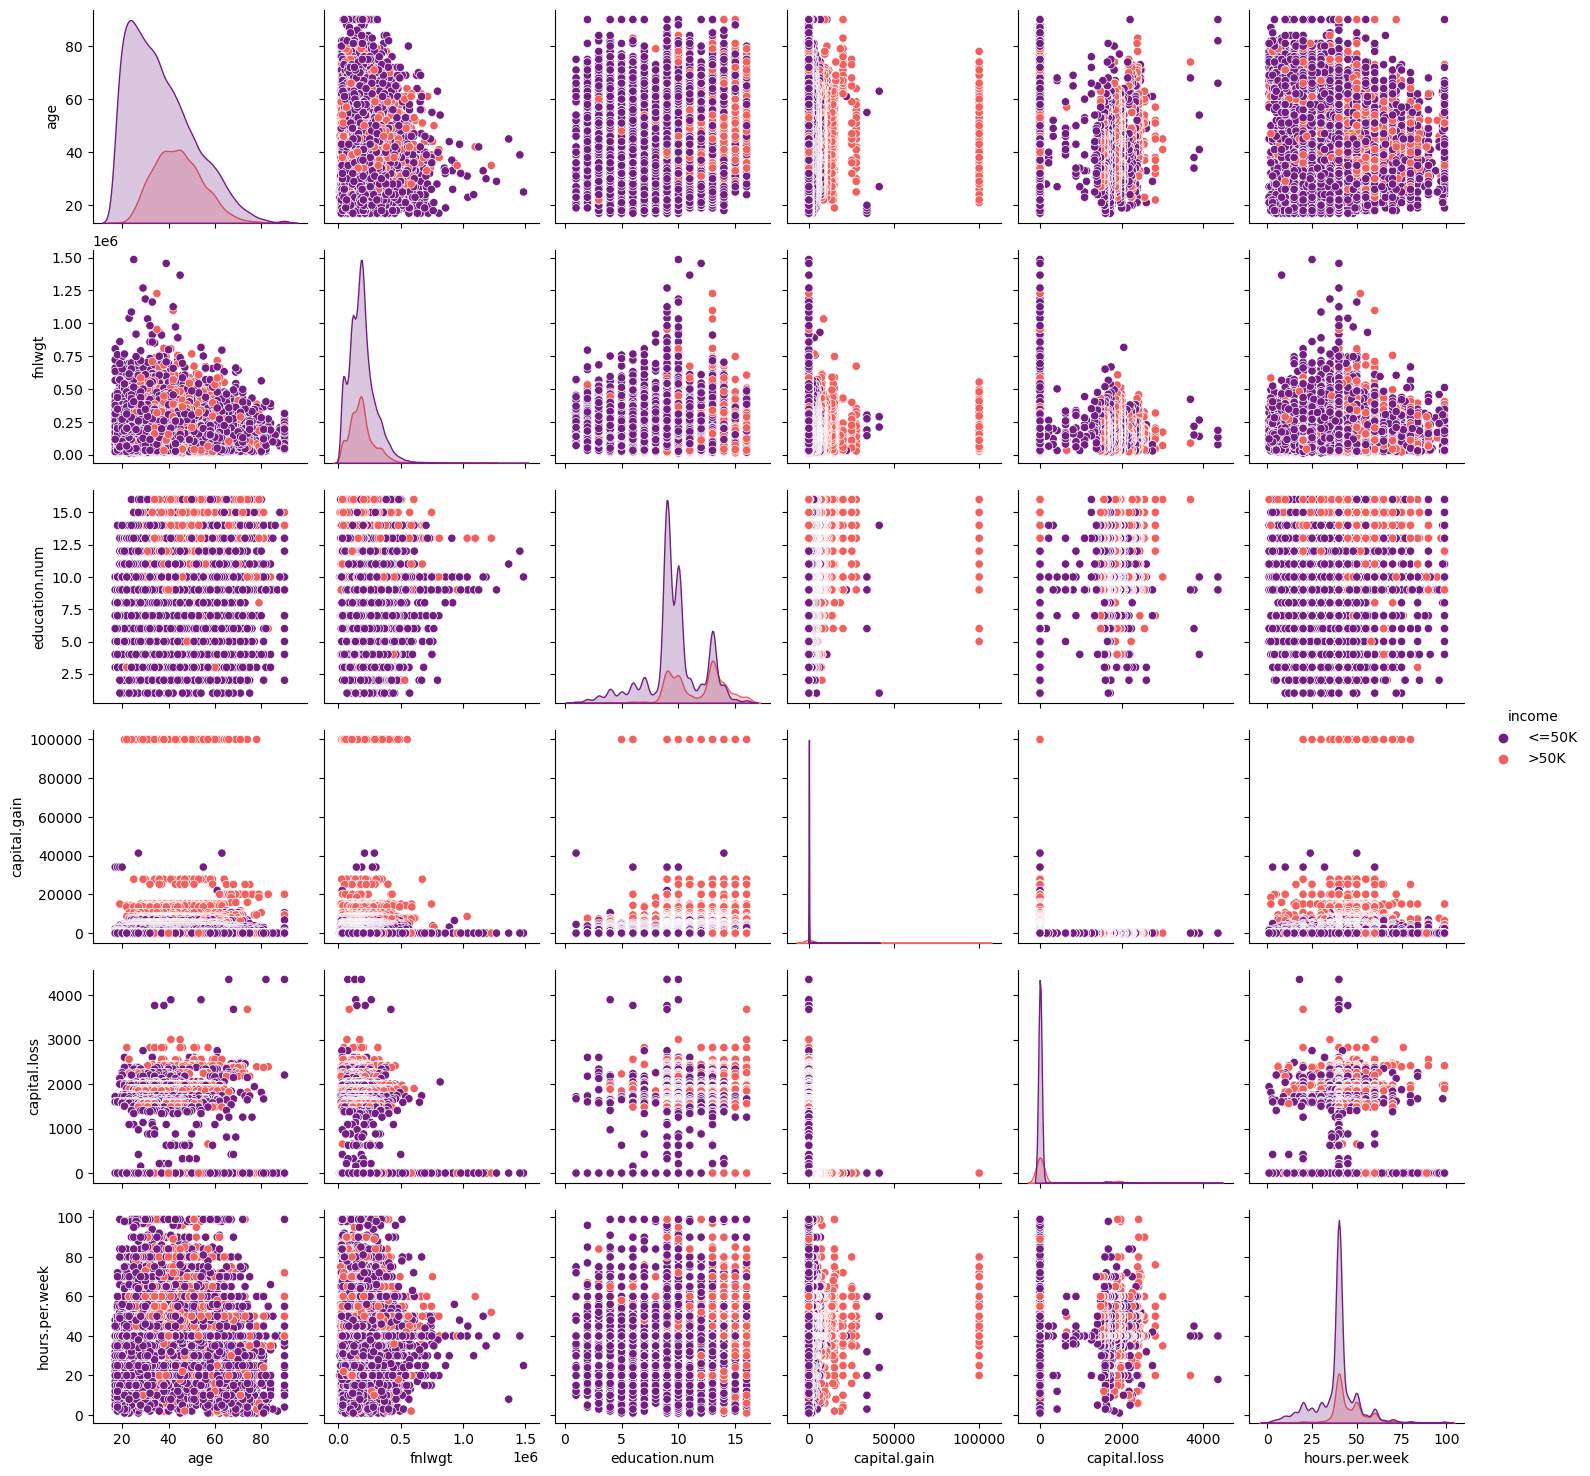

In [21]:
sns.pairplot(df,hue='income',palette='magma')

# all missing values are filled

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [23]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
# as education and edcation.num are same we will drop education
df.drop('education',axis=1,inplace=True)

In [10]:
cat_col = [ 'workclass','marital.status',
       'occupation', 'relationship', 'race', 'sex',
        'native.country',]
df = pd.get_dummies(df,columns=cat_col,drop_first=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
l_e = LabelEncoder()
df['income'] = l_e.fit_transform(df['income'])

In [16]:
df.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

   income  workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0       0                False                   False               True   
1       0                False                   False               True   
2       0                False                   False               True   
3       0                False                   False               True   
4       0                False                   False               True   

   ...  native.country_Portugal  native.country_Puerto-Rico  \
0  ...                    False                       False   
1  ...                    False                       False   
2  ...                    False                       False   
3  ...                    False                       False   
4  ...                    False                       False   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                    False                 False                  False   
1                    False                 False                  False   
2                    False                 False                  False   
3                    False                 False                  False   
4                    False                 False                  False   

   native.country_Thailand  native.country_Trinadad&Tobago  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   

   native.country_United-States  native.country_Vietnam  \
0                          True                   False   
1                          True                   False   
2                          True                   False   
3                          True                   False   
4                          True                   False   

   native.country_Yugoslavia  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 83 columns]

In [17]:
df['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [10]:
# now feature engineering is done its time to split and preprocess
from sklearn.model_selection import train_test_split
X = df.drop('income',axis=1)
y = df.income
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [13]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [13]:
# preprocessing
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)

# catboost
# 88% - normal
# 87% - optuna

In [9]:
from catboost import CatBoostClassifier,cv,Pool,metrics

In [16]:
parameters = {
    'iterations': 1000,                
    'learning_rate': 0.05,               
    'depth': 13,                         
    'l2_leaf_reg': 3,                   
    'bagging_temperature': 1.0,         # Controls intensity of Bayesian bagging
    'border_count': 254,                # Number of splits for numerical features         # Indices of categorical features in the input data
    'thread_count': 4,                  # Number of parallel threads used for training
    'random_seed': 42,                  # Seed for random number generator for reproducibility
    'loss_function': 'Logloss',         # Loss function to optimize during training
    'eval_metric': 'AUC',               # Metric used for evaluation
    'custom_metric': ['Accuracy', 'AUC'], # Additional metrics to be evaluated during training
    'use_best_model': True,            
    'od_type': 'Iter',                  
    'verbose': True              
}

In [17]:
cat_ft = np.where(X.dtypes != float)[0]
model = CatBoostClassifier(
    **parameters
)
model.fit(
    X_train, y_train,
    cat_features=cat_ft,
    eval_set=(X_val, y_val),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True,
    
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9096668	best: 0.9096668 (0)	total: 74.4ms	remaining: 1m 14s
1:	test: 0.9128546	best: 0.9128546 (1)	total: 209ms	remaining: 1m 44s
2:	test: 0.9188028	best: 0.9188028 (2)	total: 424ms	remaining: 2m 21s
3:	test: 0.9192822	best: 0.9192822 (3)	total: 447ms	remaining: 1m 51s
4:	test: 0.9184363	best: 0.9192822 (3)	total: 457ms	remaining: 1m 30s
5:	test: 0.9211178	best: 0.9211178 (5)	total: 687ms	remaining: 1m 53s
6:	test: 0.9220379	best: 0.9220379 (6)	total: 897ms	remaining: 2m 7s
7:	test: 0.9231849	best: 0.9231849 (7)	total: 1.12s	remaining: 2m 19s
8:	test: 0.9228966	best: 0.9231849 (7)	total: 1.14s	remaining: 2m 5s
9:	test: 0.9234269	best: 0.9234269 (9)	total: 1.34s	remaining: 2m 13s
10:	test: 0.9245635	best: 0.9245635 (10)	total: 1.57s	remaining: 2m 21s
11:	test: 0.9250498	best: 0.9250498 (11)	total: 1.76s	remaining: 2m 25s
12:	test: 0.9259107	best: 0.9259107 (12)	total: 1.95s	remaining: 2m 27s
13:	test: 0.9263564	best: 0.9263564 (13)	total: 2.14s	remaining: 2m 30s
14:	test: 0.9

115:	test: 0.9324984	best: 0.9327907 (105)	total: 20.7s	remaining: 2m 37s
116:	test: 0.9324596	best: 0.9327907 (105)	total: 20.9s	remaining: 2m 37s
117:	test: 0.9323716	best: 0.9327907 (105)	total: 21.1s	remaining: 2m 37s
118:	test: 0.9323042	best: 0.9327907 (105)	total: 21.2s	remaining: 2m 37s
119:	test: 0.9323336	best: 0.9327907 (105)	total: 21.4s	remaining: 2m 37s
120:	test: 0.9323763	best: 0.9327907 (105)	total: 21.6s	remaining: 2m 36s
121:	test: 0.9323450	best: 0.9327907 (105)	total: 21.8s	remaining: 2m 36s
122:	test: 0.9323068	best: 0.9327907 (105)	total: 22s	remaining: 2m 36s
123:	test: 0.9323464	best: 0.9327907 (105)	total: 22.2s	remaining: 2m 36s
124:	test: 0.9322806	best: 0.9327907 (105)	total: 22.3s	remaining: 2m 36s
125:	test: 0.9322392	best: 0.9327907 (105)	total: 22.5s	remaining: 2m 36s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.932790693
bestIteration = 105

Shrink model to first 106 iterations.


In [18]:
pred_cat = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_cat))
print(confusion_matrix(y_test,pred_cat))

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7410
        >50K       0.79      0.67      0.72      2352

    accuracy                           0.88      9762
   macro avg       0.85      0.81      0.82      9762
weighted avg       0.87      0.88      0.87      9762

[[6995  415]
 [ 782 1570]]


# hypertuning

In [34]:
import optuna
from sklearn.metrics import roc_auc_score
categorical_features_indices = np.where(X.dtypes != float)[0]

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'random_strength': trial.suggest_float('random_strength', 0.01, 1.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 10.0, log=True)
    }
    
    try:
        # Define the CatBoost classifier with the suggested parameters
        clf = CatBoostClassifier(**params, cat_features=categorical_features_indices, logging_level='Silent')
        
        # Fit the model
        clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20, verbose=False)
        
        # Calculate ROC AUC score on the test set
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        return roc_auc
    except Exception as e:
        print(f"Error during training: {e}")
        return float('-inf')  # Return negative infinity if an error occurs

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

# Fit the best model with the best parameters found
best_clf = CatBoostClassifier(**best_params, cat_features=categorical_features_indices, logging_level='Silent')
best_clf.fit(X_train, y_train)

# Evaluate the best model
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
best_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Best parameters:", best_params)
y_pred = best_clf.predict(X_test)
print(classification_report(y_pred,y_test))

[I 2024-02-23 01:16:15,459] A new study created in memory with name: no-name-30e4498b-d6d3-407e-8dc3-93ba83746128
[I 2024-02-23 01:16:18,626] Trial 0 finished with value: 0.9171773297713147 and parameters: {'iterations': 175, 'depth': 4, 'learning_rate': 0.013150550629599652, 'random_strength': 0.42101035887942284, 'bagging_temperature': 5.283328500961567, 'border_count': 65, 'l2_leaf_reg': 4.579402118219176, 'scale_pos_weight': 0.16762371600125459}. Best is trial 0 with value: 0.9171773297713147.
[I 2024-02-23 01:16:23,783] Trial 1 finished with value: 0.924751352970338 and parameters: {'iterations': 190, 'depth': 10, 'learning_rate': 0.011690175377551428, 'random_strength': 0.22744969573655013, 'bagging_temperature': 5.5578611956629365, 'border_count': 90, 'l2_leaf_reg': 2.0742119624380586, 'scale_pos_weight': 0.27659279482160454}. Best is trial 1 with value: 0.924751352970338.
[I 2024-02-23 01:16:26,648] Trial 2 finished with value: 0.924873137514115 and parameters: {'iterations': 1

[I 2024-02-23 01:17:37,129] Trial 21 finished with value: 0.9314193221148109 and parameters: {'iterations': 278, 'depth': 8, 'learning_rate': 0.10871625621529528, 'random_strength': 0.029370630658139517, 'bagging_temperature': 6.3064482810544575, 'border_count': 238, 'l2_leaf_reg': 6.566137309557605, 'scale_pos_weight': 1.864220476235294}. Best is trial 18 with value: 0.9317482694832318.
[I 2024-02-23 01:17:40,408] Trial 22 finished with value: 0.932484800600402 and parameters: {'iterations': 265, 'depth': 7, 'learning_rate': 0.19120376299645594, 'random_strength': 0.031238169631882404, 'bagging_temperature': 6.319967227627373, 'border_count': 208, 'l2_leaf_reg': 6.046524183474987, 'scale_pos_weight': 1.7247594597568354}. Best is trial 22 with value: 0.932484800600402.
[I 2024-02-23 01:17:43,683] Trial 23 finished with value: 0.9321606729736428 and parameters: {'iterations': 267, 'depth': 7, 'learning_rate': 0.19255791894267152, 'random_strength': 0.041581703429831994, 'bagging_tempera

[I 2024-02-23 01:18:51,662] Trial 43 finished with value: 0.931662776446611 and parameters: {'iterations': 300, 'depth': 4, 'learning_rate': 0.05817973752128605, 'random_strength': 0.024331835403131007, 'bagging_temperature': 3.8893416704532138, 'border_count': 201, 'l2_leaf_reg': 7.353899697346892, 'scale_pos_weight': 5.852858145354543}. Best is trial 22 with value: 0.932484800600402.
[I 2024-02-23 01:18:55,383] Trial 44 finished with value: 0.9322431249827866 and parameters: {'iterations': 266, 'depth': 6, 'learning_rate': 0.14456931316420465, 'random_strength': 0.9138197861796864, 'bagging_temperature': 4.472105505533545, 'border_count': 221, 'l2_leaf_reg': 3.894320485146355, 'scale_pos_weight': 1.6920879999694636}. Best is trial 22 with value: 0.932484800600402.
[I 2024-02-23 01:18:58,504] Trial 45 finished with value: 0.9312422826755534 and parameters: {'iterations': 243, 'depth': 7, 'learning_rate': 0.14315362366720838, 'random_strength': 0.4788802946107678, 'bagging_temperature'

[I 2024-02-23 01:20:06,534] Trial 65 finished with value: 0.9291005386635086 and parameters: {'iterations': 226, 'depth': 8, 'learning_rate': 0.14777657364470317, 'random_strength': 0.06734926729471931, 'bagging_temperature': 8.362738589513311, 'border_count': 232, 'l2_leaf_reg': 0.38075723334519385, 'scale_pos_weight': 1.5440165838452278}. Best is trial 22 with value: 0.932484800600402.
[I 2024-02-23 01:20:09,987] Trial 66 finished with value: 0.9313132304203734 and parameters: {'iterations': 210, 'depth': 7, 'learning_rate': 0.19742860782697133, 'random_strength': 0.05000040760590596, 'bagging_temperature': 7.423596696363113, 'border_count': 208, 'l2_leaf_reg': 8.463771148550515, 'scale_pos_weight': 2.0504911450634364}. Best is trial 22 with value: 0.932484800600402.
[I 2024-02-23 01:20:13,305] Trial 67 finished with value: 0.9314952330459849 and parameters: {'iterations': 262, 'depth': 7, 'learning_rate': 0.17028750395418446, 'random_strength': 0.11845498649601578, 'bagging_temperat

[I 2024-02-23 01:21:21,988] Trial 87 finished with value: 0.9322234730599394 and parameters: {'iterations': 273, 'depth': 5, 'learning_rate': 0.09303046769948989, 'random_strength': 0.02733681810884527, 'bagging_temperature': 4.318593482282946, 'border_count': 198, 'l2_leaf_reg': 4.475283796588825, 'scale_pos_weight': 1.3048445525012098}. Best is trial 22 with value: 0.932484800600402.
[I 2024-02-23 01:21:26,050] Trial 88 finished with value: 0.9321300618763024 and parameters: {'iterations': 269, 'depth': 5, 'learning_rate': 0.0969654258096342, 'random_strength': 0.01581404151352569, 'bagging_temperature': 4.330618698802419, 'border_count': 202, 'l2_leaf_reg': 5.256039607815184, 'scale_pos_weight': 1.3026936198807662}. Best is trial 22 with value: 0.932484800600402.
[I 2024-02-23 01:21:29,119] Trial 89 finished with value: 0.9318868083670715 and parameters: {'iterations': 281, 'depth': 4, 'learning_rate': 0.20427001074675424, 'random_strength': 0.013057147696226824, 'bagging_temperatur

Best parameters: {'iterations': 292, 'depth': 5, 'learning_rate': 0.18398457898865492, 'random_strength': 0.5768419528150521, 'bagging_temperature': 3.8789420807166595, 'border_count': 196, 'l2_leaf_reg': 7.76067601835542, 'scale_pos_weight': 1.6714079449584263}
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7303
           1       0.76      0.73      0.74      2459

    accuracy                           0.87      9762
   macro avg       0.83      0.82      0.83      9762
weighted avg       0.87      0.87      0.87      9762



In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter grid
param_dist = {
    'iterations': sp_randint(50, 1500),  # Increased range for iterations
    'depth': sp_randint(4, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Removed redundant values
    'random_strength': [0.01, 0.1, 0.5, 1],
    'bagging_temperature': [0.0, 1.0, 2.5, 5.0, 10.0],  # Removed redundant values
    'border_count': sp_randint(1, 255),
    'l2_leaf_reg': [0.1, 1, 5, 10],  # Removed redundant values
    'scale_pos_weight': [0.1, 1, 5, 10]  # Removed redundant values
}

# Create CatBoost classifier
clf = CatBoostClassifier(logging_level='Silent')

# Randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', random_state=42, verbose=2, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Fit the best model with the best parameters found
best_clf = CatBoostClassifier(**best_params, logging_level='Silent')
best_clf.fit(X_train, y_train)
y_pred_rcv = best_clf.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [27]:
print(classification_report(y_test,y_pred_rcv))
print(confusion_matrix(y_test,y_pred_rcv))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7417
           1       0.78      0.66      0.72      2352

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769

[[6972  445]
 [ 795 1557]]
[CV] END bagging_temperature=2.5, border_count=215, depth=6, iterations=137, l2_leaf_reg=0.1, learning_rate=0.2, random_strength=1, scale_pos_weight=10; total time=   1.8s
[CV] END bagging_temperature=1.0, border_count=192, depth=7, iterations=326, l2_leaf_reg=0.1, learning_rate=0.2, random_strength=0.1, scale_pos_weight=1; total time=   4.4s
[CV] END bagging_temperature=1.0, border_count=192, depth=7, iterations=326, l2_leaf_reg=0.1, learning_rate=0.2, random_strength=0.1, scale_pos_weight=1; total time=   2.9s
[CV] END bagging_temperature=10.0, border_count=236, depth=4, iterations=524, l2_leaf_reg=5, learning_rate=0.05, random_strength

[CV] END bagging_temperature=2.5, border_count=215, depth=6, iterations=137, l2_leaf_reg=0.1, learning_rate=0.2, random_strength=1, scale_pos_weight=10; total time=   1.8s
[CV] END bagging_temperature=2.5, border_count=150, depth=8, iterations=819, l2_leaf_reg=10, learning_rate=0.2, random_strength=0.1, scale_pos_weight=1; total time=  12.8s
[CV] END bagging_temperature=5.0, border_count=64, depth=4, iterations=1204, l2_leaf_reg=0.1, learning_rate=0.1, random_strength=0.5, scale_pos_weight=0.1; total time=  10.1s
[CV] END bagging_temperature=1.0, border_count=9, depth=5, iterations=614, l2_leaf_reg=1, learning_rate=0.2, random_strength=1, scale_pos_weight=5; total time=   5.6s
[CV] END bagging_temperature=10.0, border_count=191, depth=5, iterations=779, l2_leaf_reg=10, learning_rate=0.05, random_strength=0.1, scale_pos_weight=1; total time=   6.0s
[CV] END bagging_temperature=5.0, border_count=14, depth=9, iterations=1325, l2_leaf_reg=0.1, learning_rate=0.3, random_strength=1, scale_po

[CV] END bagging_temperature=2.5, border_count=215, depth=6, iterations=137, l2_leaf_reg=0.1, learning_rate=0.2, random_strength=1, scale_pos_weight=10; total time=   1.3s
[CV] END bagging_temperature=2.5, border_count=150, depth=8, iterations=819, l2_leaf_reg=10, learning_rate=0.2, random_strength=0.1, scale_pos_weight=1; total time=  11.0s
[CV] END bagging_temperature=5.0, border_count=208, depth=9, iterations=1007, l2_leaf_reg=5, learning_rate=0.1, random_strength=1, scale_pos_weight=5; total time=  15.3s
[CV] END bagging_temperature=5.0, border_count=50, depth=7, iterations=1075, l2_leaf_reg=1, learning_rate=0.05, random_strength=1, scale_pos_weight=1; total time=   9.9s
[CV] END bagging_temperature=1.0, border_count=111, depth=8, iterations=841, l2_leaf_reg=1, learning_rate=0.01, random_strength=1, scale_pos_weight=10; total time=   9.4s
[CV] END bagging_temperature=5.0, border_count=237, depth=4, iterations=1230, l2_leaf_reg=5, learning_rate=0.3, random_strength=0.01, scale_pos_w

[CV] END bagging_temperature=2.5, border_count=215, depth=6, iterations=137, l2_leaf_reg=0.1, learning_rate=0.2, random_strength=1, scale_pos_weight=10; total time=   1.3s
[CV] END bagging_temperature=2.5, border_count=150, depth=8, iterations=819, l2_leaf_reg=10, learning_rate=0.2, random_strength=0.1, scale_pos_weight=1; total time=  11.0s
[CV] END bagging_temperature=5.0, border_count=208, depth=9, iterations=1007, l2_leaf_reg=5, learning_rate=0.1, random_strength=1, scale_pos_weight=5; total time=  15.1s
[CV] END bagging_temperature=5.0, border_count=199, depth=7, iterations=558, l2_leaf_reg=10, learning_rate=0.1, random_strength=0.1, scale_pos_weight=0.1; total time=   5.4s
[CV] END bagging_temperature=5.0, border_count=14, depth=9, iterations=1325, l2_leaf_reg=0.1, learning_rate=0.3, random_strength=1, scale_pos_weight=0.1; total time=  18.4s
[CV] END bagging_temperature=2.5, border_count=163, depth=4, iterations=428, l2_leaf_reg=0.1, learning_rate=0.05, random_strength=0.5, scal

[CV] END bagging_temperature=5.0, border_count=93, depth=6, iterations=1145, l2_leaf_reg=0.1, learning_rate=0.3, random_strength=0.5, scale_pos_weight=1; total time=  13.1s
[CV] END bagging_temperature=5.0, border_count=64, depth=4, iterations=1204, l2_leaf_reg=0.1, learning_rate=0.1, random_strength=0.5, scale_pos_weight=0.1; total time=   8.4s
[CV] END bagging_temperature=0.0, border_count=167, depth=5, iterations=437, l2_leaf_reg=0.1, learning_rate=0.2, random_strength=0.1, scale_pos_weight=1; total time=   3.3s
[CV] END bagging_temperature=1.0, border_count=9, depth=5, iterations=614, l2_leaf_reg=1, learning_rate=0.2, random_strength=1, scale_pos_weight=5; total time=   5.6s
[CV] END bagging_temperature=10.0, border_count=191, depth=5, iterations=779, l2_leaf_reg=10, learning_rate=0.05, random_strength=0.1, scale_pos_weight=1; total time=   6.3s
[CV] END bagging_temperature=5.0, border_count=14, depth=9, iterations=1325, l2_leaf_reg=0.1, learning_rate=0.3, random_strength=1, scale_

[CV] END bagging_temperature=5.0, border_count=93, depth=6, iterations=1145, l2_leaf_reg=0.1, learning_rate=0.3, random_strength=0.5, scale_pos_weight=1; total time=  12.9s
[CV] END bagging_temperature=5.0, border_count=208, depth=9, iterations=1007, l2_leaf_reg=5, learning_rate=0.1, random_strength=1, scale_pos_weight=5; total time=  15.6s
[CV] END bagging_temperature=5.0, border_count=50, depth=7, iterations=1075, l2_leaf_reg=1, learning_rate=0.05, random_strength=1, scale_pos_weight=1; total time=   9.8s
[CV] END bagging_temperature=1.0, border_count=111, depth=8, iterations=841, l2_leaf_reg=1, learning_rate=0.01, random_strength=1, scale_pos_weight=10; total time=   9.5s
[CV] END bagging_temperature=0.0, border_count=88, depth=4, iterations=697, l2_leaf_reg=10, learning_rate=0.1, random_strength=0.5, scale_pos_weight=0.1; total time=   4.7s
[CV] END bagging_temperature=2.5, border_count=163, depth=4, iterations=428, l2_leaf_reg=0.1, learning_rate=0.05, random_strength=0.5, scale_po

[CV] END bagging_temperature=5.0, border_count=93, depth=6, iterations=1145, l2_leaf_reg=0.1, learning_rate=0.3, random_strength=0.5, scale_pos_weight=1; total time=  11.2s
[CV] END bagging_temperature=10.0, border_count=236, depth=4, iterations=524, l2_leaf_reg=5, learning_rate=0.05, random_strength=1, scale_pos_weight=10; total time=   6.6s
[CV] END bagging_temperature=0.0, border_count=167, depth=5, iterations=437, l2_leaf_reg=0.1, learning_rate=0.2, random_strength=0.1, scale_pos_weight=1; total time=   3.9s
[CV] END bagging_temperature=1.0, border_count=9, depth=5, iterations=614, l2_leaf_reg=1, learning_rate=0.2, random_strength=1, scale_pos_weight=5; total time=   4.5s
[CV] END bagging_temperature=5.0, border_count=199, depth=7, iterations=558, l2_leaf_reg=10, learning_rate=0.1, random_strength=0.1, scale_pos_weight=0.1; total time=   5.5s
[CV] END bagging_temperature=10.0, border_count=191, depth=5, iterations=779, l2_leaf_reg=10, learning_rate=0.05, random_strength=0.1, scale_